In [47]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [48]:
def get_lower_and_upper_bounds(col, multiplier = 1.5):
    '''
    This function takes in a pandas Series and multiplier for IQR (default is 1.5).
    It returns the lower and upper bounds.
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    inner_lower_fence = round(q1 - (multiplier * iqr), 3)
    inner_upper_fence = round(q3 + (multiplier * iqr), 3)
    
    return inner_lower_fence, inner_upper_fence


### 1. Using lemonade.csv dataset and focusing on continuous variables

In [49]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [51]:
# change date to a datetime object and set as index

df.Date = pd.to_datetime(df.Date)


In [52]:
df = df.set_index('Date')

In [53]:
# check df now 

df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [54]:
# since we have a day of the week column, let's also create a month column

df['Month'] = df.index.month_name()

# month_name will give string values of the month names

In [55]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


In [56]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


### Takeaways

- temperature's max of 212 seems really high
- min of -38 for flyers is strange too

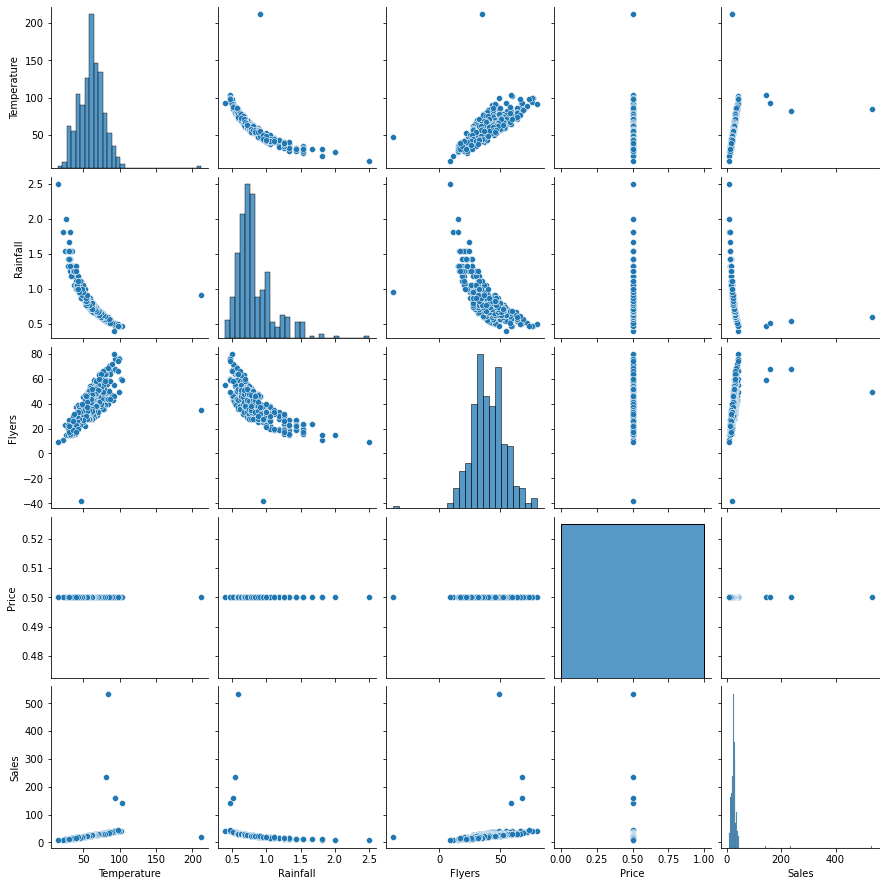

In [57]:
sns.pairplot(df)

- rainfall seems seasonal
- temperature changes through the year
- negative values for flyers could not be real
- sales seems to have some very high extreme values

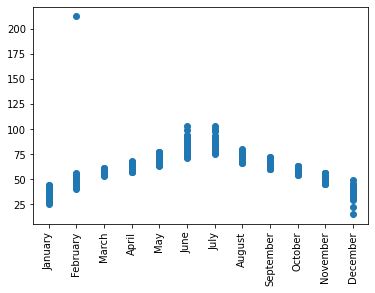

In [58]:
plt.scatter(df.Month, df.Temperature)
plt.xticks(rotation=90)
plt.show()

- The data points are not aggregated so it just shows a bunch of values on top of each other
- One extreme value for February
- We could look into imputing this one value

### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

### b. Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense?Which outliers should be kept?

In [20]:
get_lower_and_upper_bounds(df.Temperature, multiplier = 1.5)

(16.7, 104.7)

In [42]:
def get_outliers(df, multiplier = 1.5):
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            print ([col])
            lower, upper = get_lower_and_upper_bounds(df[col], multiplier = multiplier)
            print(lower, upper)

In [43]:
get_outliers(df)

['Temperature']
16.7 104.7
['Rainfall']
0.26 1.3
['Flyers']
4.0 76.0
['Price']
0.5 0.5
['Sales']
5.0 45.0


In [65]:
# at a multiplier of 1.5:

# initialize empty dictionary
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        # call function to get upper and lower bounds
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------\n')
        # initialize a dictionary within outliers dictionary for every column
        outliers[col] = {}
        # create a bounds key for every col's dictionary and add upper and lower bound values
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        # add a df key for every column and only the part of df above upper and below lower bounds
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    
    else:
        pass

 Lower bound for Temperature : 16.7
 Upper bound for Temperature: 104.7

-----------------

 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------

 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------

 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------

 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------



In [61]:
# in outliers dictionary call temperature dictionary and within that call df key
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [66]:
# for every column in df print the values in df above and below upper and lower bounds

[print('\n~~~~~~~~~~~~~~~~~~~~\n', key, ':\n', outliers[key]['df']) for key in outliers]



~~~~~~~~~~~~~~~~~~~~
 Temperature :
                  Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                       
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February
2017-12-31    Sunday         15.1      2.50       9    0.5      7  December

~~~~~~~~~~~~~~~~~~~~
 Rainfall :
                   Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                        
2017-01-01     Sunday         27.0      2.00      15    0.5     10   January
2017-01-02     Monday         28.9      1.33      15    0.5     13   January
2017-01-03    Tuesday         34.5      1.33      27    0.5     15   January
2017-01-06     Friday         25.3      1.54      23    0.5     11   January
2017-01-07   Saturday         32.9      1.54      19    0.5     13   January
2017-01-11  Wednesday         32.6      1.54      23    0.5     12   January
2017-01

[None, None, None, None, None]

### c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

### d. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [44]:
get_outliers(df, multiplier = 3)

['Temperature']
-16.3 137.7
['Rainfall']
-0.13 1.69
['Flyers']
-23.0 103.0
['Price']
0.5 0.5
['Sales']
-10.0 60.0


In [67]:
# at a multiplier of 3.0:

# initialize empty dictionary
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        # call function to get upper and lower bounds
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col],multiplier=3 )
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------\n')
        # initialize a dictionary within outliers dictionary for every column
        outliers[col] = {}
        # create a bounds key for every col's dictionary and add upper and lower bound values
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        # add a df key for every column and only the part of df above upper and below lower bounds
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    
    else:
        pass

 Lower bound for Temperature : -16.3
 Upper bound for Temperature: 137.7

-----------------

 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------

 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------

 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------

 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------



In [69]:
[print('\n~~~~~~~~~~~~~~~~~~~~\n', key, ':\n', outliers[key]['df']) for key in outliers]


~~~~~~~~~~~~~~~~~~~~
 Temperature :
                  Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                       
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February

~~~~~~~~~~~~~~~~~~~~
 Rainfall :
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                      
2017-01-01   Sunday         27.0      2.00      15    0.5     10   January
2017-12-05  Tuesday         22.0      1.82      11    0.5     10  December
2017-12-10   Sunday         31.3      1.82      15    0.5     11  December
2017-12-31   Sunday         15.1      2.50       9    0.5      7  December

~~~~~~~~~~~~~~~~~~~~
 Flyers :
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                      
2017-11-21  Tuesday         47.0      0.95     -38    0.5     20  

[None, None, None, None, None]

### Takeaways

- July 4th has exceptionally high sales, slightly suspect but plausible -- will check context for summer sales
- negative flyer value needs to be fixed, does not make logical sense on 2017-11-21
- on 2017-02-11 day with exceptionally high temperature is beyond capacity for human survival, probably suspicious


### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?


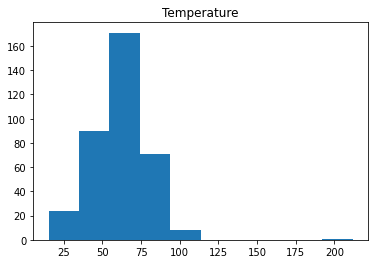

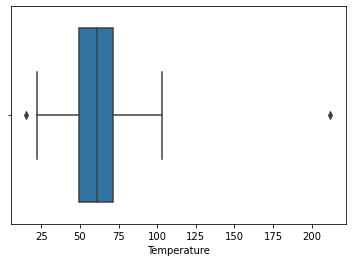

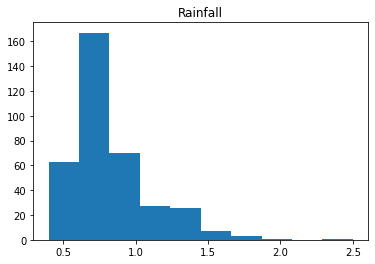

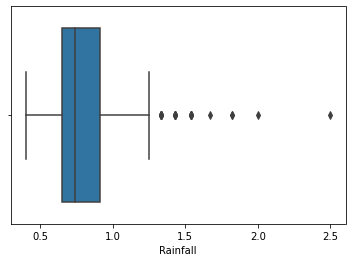

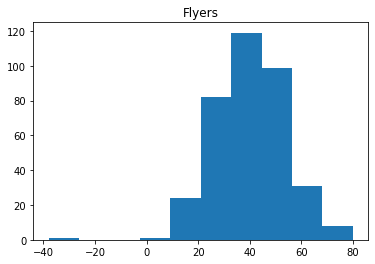

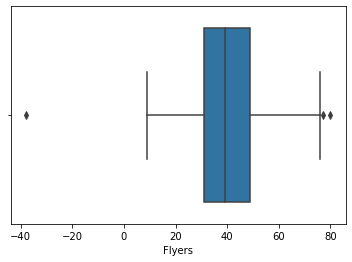

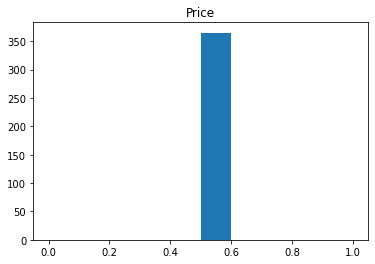

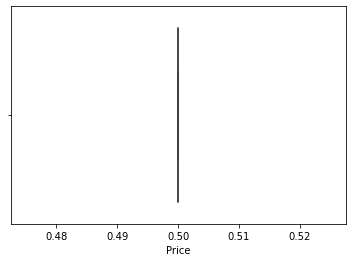

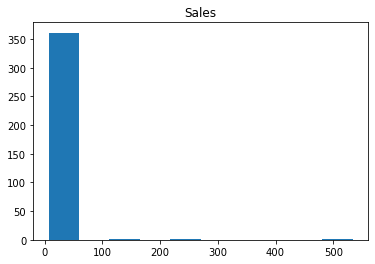

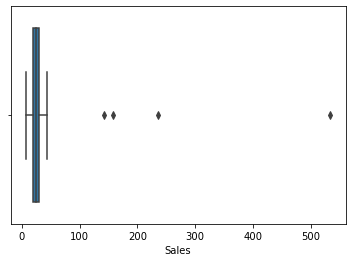

In [46]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.grid(False)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

### Takeaways

- Temperature and Flyers are fairly normally distributed
- Rainfall also looks fairly normal but has some upper outliers
- Flyers might need imputing for the extreme values
- Sales seem to all be in the same range 
    - this can be visualized by increasing the number of bins

In [70]:
normal_cols = ['Temperature', 'Flyers', 'Rainfall']

In [73]:
# using 2 sigma

for col in normal_cols:
    df['z_score_'+ col] = (df[col] - df[col].mean()) / df[col].std()
    print(col)
    print(df[df['z_score_' + col].abs() > 2])
    print('-------\n')

Temperature
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                          
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February   
2017-06-16    Friday         99.3      0.47      77    0.5     41      June   
2017-06-26    Monday        102.6      0.47      60    0.5     42      June   
2017-07-01  Saturday        102.9      0.47      59    0.5    143      July   
2017-07-10    Monday         98.0      0.49      66    0.5     40      July   
2017-07-18   Tuesday         99.3      0.47      76    0.5     41      July   
2017-07-22  Saturday         99.6      0.47      49    0.5     42      July   
2017-07-27  Thursday         97.9      0.47      74    0.5     43      July   
2017-12-05   Tuesday         22.0      1.82      11    0.5     10  December   
2017-12-31    Sunday         15.1      2.50       9    0.5      7  December   

            z_score_Temperature  z_scor

### Takeaways

- z score very high for temperature on 2017-02-11 because of the very high temp that day
- error seems really high for Rainfal on 2017-12-31
    - Rainfall has a very high value on that day
    - We can check that with context
- flyers has a negative value that needs to be checked

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [74]:
# using 3 sigma

for col in normal_cols:
    df['z_score_'+ col] = (df[col] - df[col].mean()) / df[col].std()
    print(col)
    print(df[df['z_score_' + col].abs() > 3])
    print('-------\n')

Temperature
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                          
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February   

            z_score_Temperature  z_score_Flyers  z_score_Rainfall  
Date                                                               
2017-02-11             8.336627       -0.370227          0.306792  
-------

Flyers
                Day  Temperature  Rainfall  Flyers  Price  Sales     Month  \
Date                                                                         
2017-11-21  Tuesday         47.0      0.95     -38    0.5     20  November   

            z_score_Temperature  z_score_Flyers  z_score_Rainfall  
Date                                                               
2017-11-21            -0.786506       -5.665283          0.452836  
-------

Rainfall
                Day  Temperature  Rainfall  Flyers  Price  Sales     Mont

### Takeaways 

- z score very high on 2017-02-11 due to the high temperature 
- z score high for flyer on 2017-11-21 due to the negative value 